<a href="https://colab.research.google.com/github/nurmuhimawann/machine-learning-models-time-series/blob/main/Submission_Time_Series_MLFE_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Profile** <br>
*Nama: Nur Muhammad Himawan* <br>
*Domisili: Banyuwangi, Jawa Timur* <br>
*E-mail: muhammad.himawan73@gmail.com* <br>
*Path: Machine Learning & Front End Development* <br>
*Progam: Studi Independen Batch 3 - Kampus Merdeka*

## **Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series**

Selamat, Anda telah menyelesaikan modul Time Series. Anda sudah mempelajari bagaimana mengembangkan jaringan saraf tiruan untuk masalah Time Series. Untuk bisa melanjutkan ke modul selanjutnya, Anda harus mengirimkan submission berupa proyek membuat model untuk prediksi Time Series. 

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset Preparation**

In [ ]:
# API my kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

kaggle.json


In [ ]:
# source dataset -> https://www.kaggle.com/datasets/mahirkukreja/delhi-weather-data
! kaggle datasets download mahirkukreja/delhi-weather-data

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 133MB/s]


In [ ]:
# unzip
! unzip delhi-weather-data.zip -d /content/data/

Archive:  delhi-weather-data.zip
  inflating: /content/data/testset.csv  


**Load Dataset**

Delhi Weather Data.
This dataset contains weather data for New Delhi, India. It contains various features such as temperature, pressure, humidity, rain, precipitation,etc.

In [ ]:
# read_csv
import pandas as pd
df = pd.read_csv('/content/data/testset.csv')
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [ ]:
# change string object to datetime in columns 'dt'
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df.dtypes

datetime_utc    datetime64[ns]
 _conds                 object
 _dewptm               float64
 _fog                    int64
 _hail                   int64
 _heatindexm           float64
 _hum                  float64
 _precipm              float64
 _pressurem            float64
 _rain                   int64
 _snow                   int64
 _tempm                float64
 _thunder                int64
 _tornado                int64
 _vism                 float64
 _wdird                float64
 _wdire                 object
 _wgustm               float64
 _windchillm           float64
 _wspdm                float64
dtype: object

**Selection Data**

In [ ]:
# selection used columns (date and temp)
df = df[['datetime_utc',' _tempm' ]]
df

,datetime_utc,_tempm
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0
...,...,...
100985,2017-04-24 06:00:00,34.0
100986,2017-04-24 09:00:00,38.0
100987,2017-04-24 12:00:00,36.0
100988,2017-04-24 15:00:00,32.0


**Handling Missing Values**

In [ ]:
# check missing value
df.isnull().sum()

datetime_utc      0
 _tempm         673
dtype: int64

In [ ]:
# drop missing value
df.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# check missing value again
df.isnull().sum()

datetime_utc    0
 _tempm         0
dtype: int64

In [ ]:
# check data shape
df.shape

(100317, 2)

In [ ]:
# description statistical about the dataset
df.describe()

,_tempm
count,100317.000000
mean,25.451269
std,8.482859
min,1.000000
25%,19.000000
50%,27.000000
75%,32.000000
max,90.000000


**Split Train & Test Data**

In [ ]:
# change value to numpy array
dates = df['datetime_utc'].values
temp = df[' _tempm'].values

In [ ]:
# view date
dates

array(['1996-11-01T11:00:00.000000000', '1996-11-01T12:00:00.000000000',
       '1996-11-01T13:00:00.000000000', ...,
       '2017-04-24T12:00:00.000000000', '2017-04-24T15:00:00.000000000',
       '2017-04-24T18:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# view temperature
temp

array([30., 28., 24., ..., 36., 32., 30.])

In [ ]:
# split train_test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(temp, dates, test_size = 0.2)

print('amount of training data: {0}'.format(len(x_train)))
print('amount of validation data: {0}'.format(len(x_test)))

amount of training data: 80253
amount of validation data: 20064


In [ ]:
# check dtype
df.dtypes

datetime_utc    datetime64[ns]
 _tempm                float64
dtype: object

**myCallbacks**

In [ ]:
# 10% mae
limit = (df[' _tempm'].max() - df[' _tempm'].min()) * (10/100)
print(limit)

# callbacks
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<limit and logs.get('val_mae')<limit):
      print("\nMAE has reached below 10% of data scale, Stop Training!!")
      self.model.stop_training = True

callbacks = myCallback()

8.9


**Windowed dataset**

In [ ]:
# accepts a series/attribute, and returns the labels and attributes of the dataset in batch form.
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
# train & val data
tf.keras.backend.set_floatx('float64')
training_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
validation_set = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=1000)

**Sequential Models**

In [ ]:
# sequential models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = tf.keras.models.Sequential([Bidirectional(LSTM(60, return_sequences=True)),
                                    Bidirectional(LSTM(60)),
                                    Dropout(0.5),
                                    Dense(30, activation="relu"),
                                    Dense(10, activation="relu"),
                                    Dense(1)])

In [ ]:
# compile
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
# fitting history
history = model.fit(training_set, 
                    epochs=25,
                    validation_data = validation_set,
                    callbacks=[callbacks])

Epoch 1/25
      6/Unknown - 15s 117ms/step - loss: 25.4210 - mae: 25.9210

802/802 [==============================] - 111s 120ms/step - loss: 13.3239 - mae: 13.8151 - val_loss: 6.4244 - val_mae: 6.9112
Epoch 2/25
802/802 [==============================] - ETA: 0s - loss: 6.8240 - mae: 7.3097
MAE has reached below 10% of data scale, Stop Training!!
802/802 [==============================] - 92s 115ms/step - loss: 6.8240 - mae: 7.3097 - val_loss: 6.4191 - val_mae: 6.9064


**Evaluation Models**

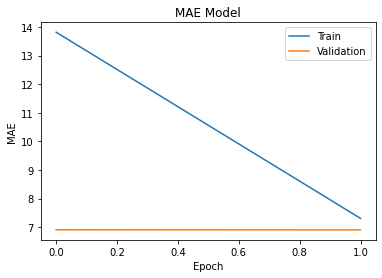

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE Model')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

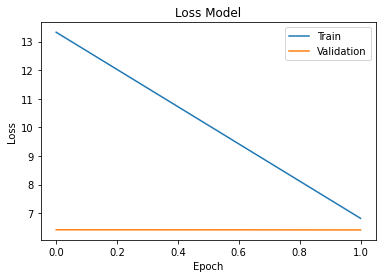

In [ ]:
# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## **Kriteria Penilaian**

Berikut kriteria submission yang harus Anda penuhi:

- Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel. **(done)**

- Harus menggunakan LSTM dalam arsitektur model. **(done)**

- Validation set sebesar 20% dari total dataset. **(done)**

- Model harus menggunakan model sequential. **(done)**

- Harus menggunakan Learning Rate pada Optimizer. **(done)**

- MAE < 10% skala data. **(done)**

Anda dapat menerapkan beberapa saran untuk mendapatkan nilai tinggi, berikut sarannya:

- Dataset yang digunakan memiliki banyak sampel data. **(done)**

- Mengimplementasikan Callback. **(done)**

- Membuat plot loss dan akurasi pada saat training dan validation. **(done)**

Detail penilaian submission:

- Bintang 1 : Semua ketentuan terpenuhi, namun terdapat indikasi plagiat yaitu dengan menggunakan proyek orang lain dan hanya mengubah kontennya saja.

- Bintang 2 : Semua ketentuan terpenuhi, namun penulisan kode berantakan.

- Bintang 3 : Semua ketentuan terpenuhi namun hanya mengikuti seperti apa yang ada pada modul.

- Bintang 4 : Semua ketentuan terpenuhi, dataset memiliki minimal 2000 sampel data dan MAE dari model < 10% skala data.

- Bintang 5 : Semua ketentuan terpenuhi, dataset memiliki minimal 10000 sampel data dan MAE dari model < 10% skala data. **(done, I used 100317 samples of all the data in the dataset and MAE < 10%)**

## **Ketentuan Berkas Submission**

Beberapa poin yang perlu diperhatikan ketika mengirimkan berkas submission:

- Menggunakan bahasa pemrograman Python. **(done)**

- Mengirimkan pekerjaan Anda dalam bentuk berkas ipynb dan py dalam 1 folder yang telah di zip. **(done)**

- File ipynb yang dikirim telah dijalankan terlebih dahulu sehingga output telah ada tanpa reviewer perlu menjalankan ulang notebook. **(done)**